**Contents**
  
1) Import libraries
2) Data Preprocessing
3) Optimal Number of Clusters
4) K-means Algorithm
5) Visualize cluster results
6) Calculate descriptive statistics
7) Discussion on Clusters



  
  



# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import Data

In [4]:
df_bank = pd.read_csv(r"C:\Users\Home\Desktop\Career Foundry- Data Analyst.2\Task Submissions\Task excercise 6-Final\Bank Customer Churn Prediction_updated.csv")

In [5]:
df_bank.head(7)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0


# Data Preprocessing

In [58]:
# Removing categorical columns by name
df_no_categorical = df.drop(columns=['country', 'gender'])

In [18]:
print(df_no_categorical.head())

   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0  


In [41]:
# Selecting relevant features
features = ['credit_score', 'age', 'balance', 'estimated_salary']

In [65]:
# Standardizing the features
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_features)


In [ ]:
# Applying the Elbow Technique
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)


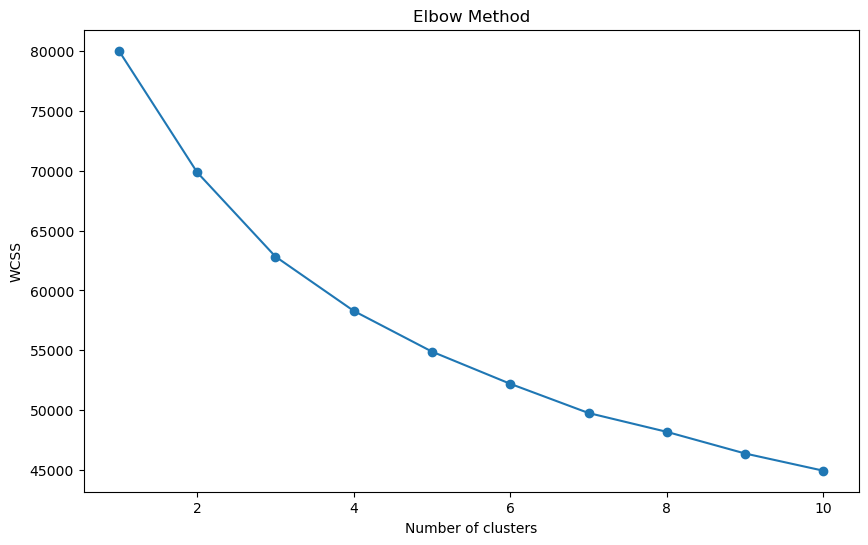

In [68]:
# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal Number of Clusters:

According to the graph, the elbow point seems to occur at around 3 clusters. This indicates that using 3 clusters is optimal for this dataset, as it offers a good trade-off between having compact clusters and keeping the model simple.

# Run the K-means Algorithm


In [69]:
#Applying K-Means Clustering with the optimal number of clusters.
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_standardized)


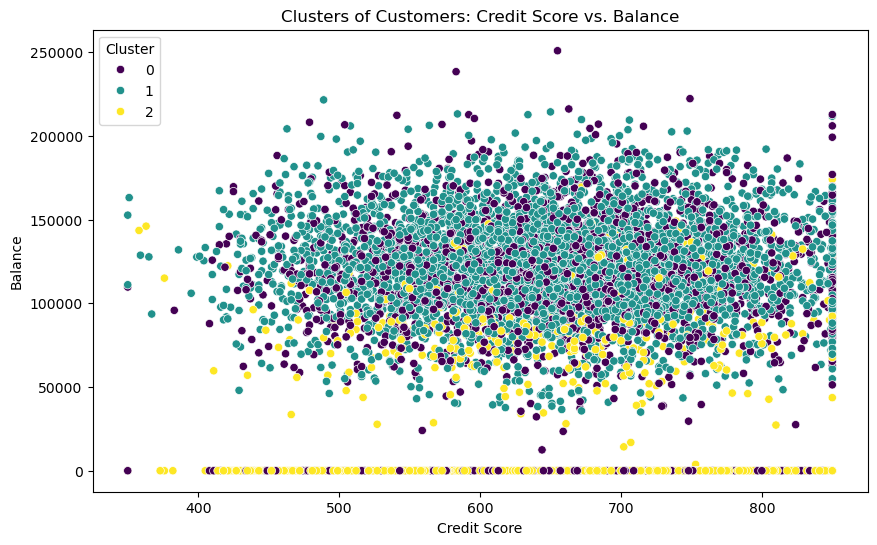

In [70]:
# Visualing the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['credit_score'], y=df['balance'], hue=df['Cluster'], palette='viridis', marker='o')
plt.title('Clusters of Customers: Credit Score vs. Balance')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.show()

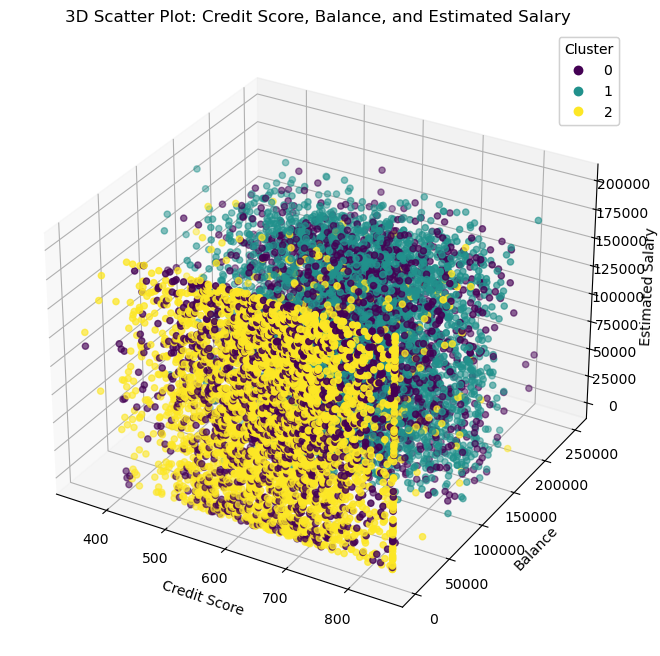

In [53]:
# 3D Scatter Plot of Credit Score, Balance, and Estimated Salary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['credit_score'], df['balance'], df['estimated_salary'], c=df['Cluster'], cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot: Credit Score, Balance, and Estimated Salary')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
legend1 = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend1)
plt.show()

**Analysis**
- Yellow Cluster: Mostly low to mid credit scores and varying balances, with a significant number of customers having very low balances.
- Teal Cluster: Mid to high credit scores with mid to high balances.
- Purple Cluster: Spread across all credit scores, but a notable number of customers have low balances.

# Plotting different variables against each other to visualize cluster results.

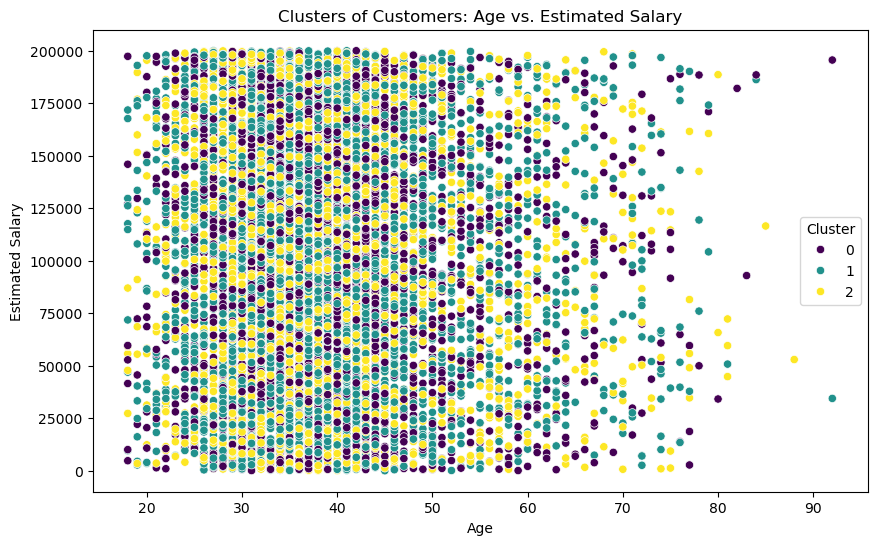

In [54]:
#Scatter Plot of Age vs. Estimated Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['estimated_salary'], hue=df['Cluster'], palette='viridis', marker='o')
plt.title('Clusters of Customers: Age vs. Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Cluster')
plt.show()

**Analysis**

The plot indicates that customers cannot be distinctly grouped based on age and estimated salary alone. The overlap suggests that other features (like credit score, balance, products number) might be needed to achieve clearer clustering.

# Discuss how and why the clusters make sense.

Clustering the dataset helps identify useful groups of customers based on their financial habits and personal details. These groups give important information that can be used for focused marketing, managing risks, and creating new products. By understanding what each group of customers like and what they need, the bank can develop better plans to keep customers satisfied , retain them for longer period of time, and grow the business.

# Calculate descriptive statistics for each cluster

In [62]:
cluster_stats = df_no_categorical.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

        customer_id                                                  \
              count          mean           std       min       max   
Cluster                                                               
0              2940  1.569244e+07  71795.957412  15565701  15815628   
1              4086  1.568845e+07  72168.798167  15565779  15815690   
2              2974  1.569288e+07  71677.319334  15565706  15815626   

        credit_score                                   ... estimated_salary  \
               count        mean        std  min  max  ...            count   
Cluster                                                ...                    
0               2940  651.385034  96.680080  350  850  ...             2940   
1               4086  650.155898  96.602949  350  850  ...             4086   
2               2974  650.194687  96.723153  350  850  ...             2974   

                                                       churn            \
                  mean  

**Interpretation:**

The descriptive statistics show that while credit scores and estimated salaries are similar across clusters, churn rates differ significantly. To address this, focus on reducing churn in Cluster 1 and maintaining engagement in Cluster 2 to keep their churn rate low.


# What k-means clustering could be useful for in future steps of an analytics pipeline.

K-means clustering identifies customer groups for targeted retention, personalized marketing, and tailored products. Understanding each group helps businesses allocate resources better, improve engagement, manage risks, and boost satisfaction and growth.